# 1. Importing Libraries 📚

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.layers import Conv1D, Concatenate, GlobalMaxPooling1D, GlobalAveragePooling1D, Dense, Embedding, Input,BatchNormalization
from tensorflow.keras.models import Model
import tensorflow as tf
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")
from sklearn.metrics import classification_report
from keras.utils import plot_model

2024-05-12 15:31:37.705172: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-12 15:31:37.705270: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-12 15:31:37.840165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# 2. Loading the Data 💬

In [19]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv',encoding = 'latin',header=None)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   0       1600000 non-null  int64 
 1   1       1600000 non-null  int64 
 2   2       1600000 non-null  object
 3   3       1600000 non-null  object
 4   4       1600000 non-null  object
 5   5       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [5]:
df.shape

(1600000, 6)

In [6]:
df.head(5)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


# 3. Preprocessing 

In [22]:
df = df[[5, 0]]
df.columns=['tweet', 'Sentiment']

In [ ]:
df['Sentiment'].unique()

### 0 -> indicates negative
### 4 -> indicates positive

Text(0.5, 1.0, 'Sentiment Field Distribution\n800000\n800000')

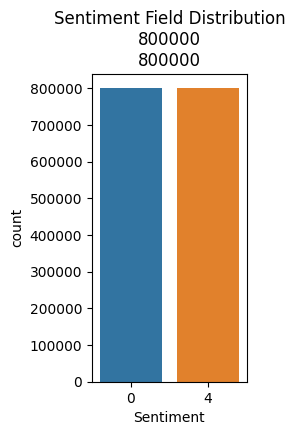

In [9]:
val_count=df["Sentiment"].value_counts()
plt.figure(figsize= (2,4))
sns.countplot(data = df, x= 'Sentiment')
plt.title(f'Sentiment Field Distribution\n{val_count.to_string(index=False, header=None)}')

In [23]:
# Mapping the 4 by 1
df.loc[df["Sentiment"] == 4, "Sentiment"] = 1

In [11]:
df.head(5)

,tweet,Sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


## Clean Text

In [7]:
stop_words = set(stopwords.words('english'))
def clean_text(sentence):
    # Removing URLS
    sentence = re.sub(r"https?://\S+|www\.\S+"," ",sentence)
    
    # Removing html tags
    sentence = re.sub(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});"," ",sentence)
    
    # Removing the Punctuation
    sentence = re.sub(r"[^\w\s]", " ", sentence)
        
    # Removing words that have numbers 
    sentence = re.sub(r"\w*\d\w*", " ", sentence)
        
    # Removing Digits 
    sentence = re.sub(r"[0-9]+", " ", sentence)
        
    # Cleaning white spaces
    sentence = re.sub(r"\s+", " ", sentence).strip()
        
    sentence = sentence.lower()
    # Check stop words
    tokens = []
    for token in sentence.split():
        if token not in stop_words:
            tokens.append(token)
    return " ".join(tokens)

In [8]:
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

# 4.Visualization

### visualise some Possitive Words...

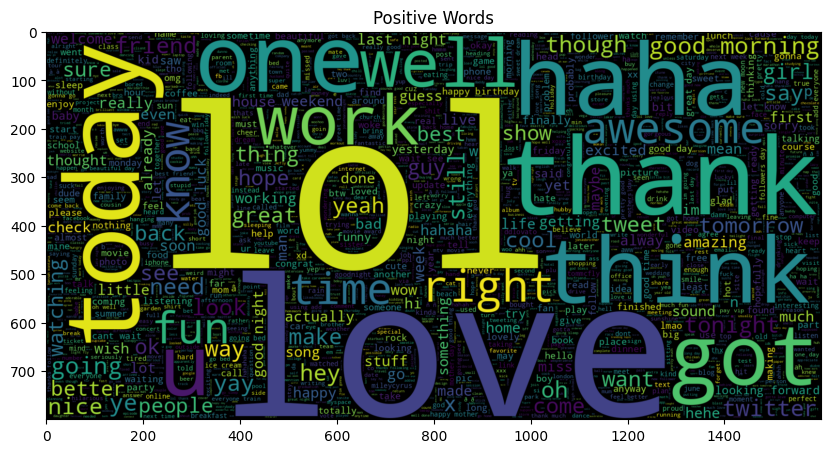

In [14]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment == 1].tweet))
plt.title("Positive Words")
plt.imshow(wc , interpolation = 'bilinear')

### Negative words >>

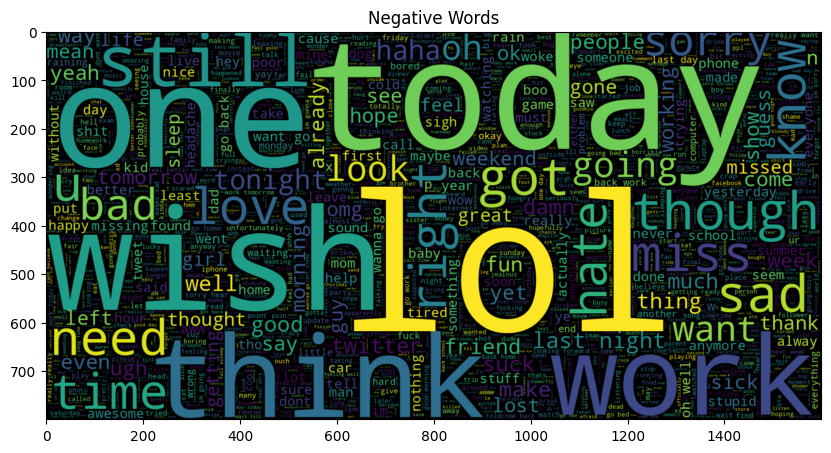

In [15]:
plt.figure(figsize = (10,10)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.Sentiment == 0].tweet))
plt.title("Negative Words")
plt.imshow(wc , interpolation = 'bilinear')

# 5. Splitting The Data

In [9]:
X = df['tweet']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print("Train Data size:", len(X_train), len(y_train))
print("Test Data size", len(X_test), len(y_test))

Train Data size: 1280000 1280000
Test Data size 320000 320000


# 6. Tokenizer

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


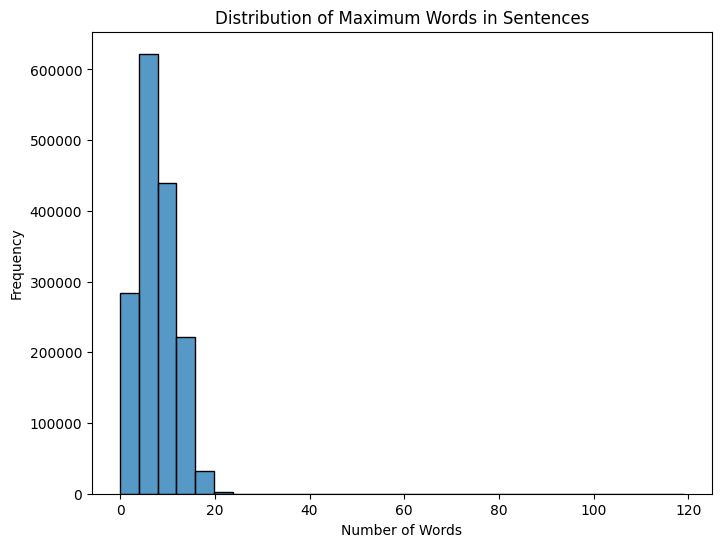

In [18]:
# padding
max_words = df['tweet'].apply(lambda x: len(x.split()))

# Plotting the distribution of the maximum number of words in sentences
plt.figure(figsize=(8, 6))
sns.histplot(max_words, bins=30)
plt.title('Distribution of Maximum Words in Sentences')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [11]:
max_len = 40  # Maximum words in each sequence.
batch_size=512

In [12]:
# padding
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
print(f"After padding: {X_train.shape}")
print(f"After padding:{X_test.shape}")

After padding: (1280000, 40)
After padding:(320000, 40)


In [13]:
# Adding +1 ensures that the vocabulary size is large enough to include this OOV token as well.
vocabulary_size = len(tokenizer.word_index)+1
embedding_dim = 100

# 5. Data Modeling

In [29]:
CNN = CNN=models.Sequential([
    layers.Embedding(vocabulary_size, embedding_dim, input_length=max_len),
    layers.Dropout(0.5),
    
    layers.Conv1D(filters=128,kernel_size=7,activation='relu'),
    layers.Conv1D(filters=128,kernel_size=7,activation='relu'),
    layers.GlobalMaxPooling1D(),
    
    layers.Flatten(),
    layers.Dense(1024,activation="relu"),
    layers.Dropout(0.5),
    
    layers.Dense(1, activation='sigmoid')
])

CNN.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ['accuracy'])

In [31]:
history=CNN.fit(X_train, y_train, epochs=10,batch_size=batch_size)

Epoch 1/10
  13/2500 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.5105 - loss: 0.6932

W0000 00:00:1714308401.913161     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 44s 15ms/step - accuracy: 0.7340 - loss: 0.5115
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8207 - loss: 0.3977
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8584 - loss: 0.3263
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8757 - loss: 0.2877
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8869 - loss: 0.2617
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.8955 - loss: 0.2419
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9031 - loss: 0.2257
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9089 - loss: 0.2126
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9127 - loss: 0.2030
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 37s 15ms/step - accuracy: 0.9168 - loss: 0.1939


In [34]:
CNN.evaluate(X_test, y_test)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - accuracy: 0.7623 - loss: 0.9472


[0.9455581307411194, 0.7628968954086304]

In [33]:
CNN.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (512, 40, 100)         │    45,853,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (512, 40, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (512, 34, 128)         │        89,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (512, 28, 128)         │       114,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_3          │ (512, 128)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (512, 128)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (512, 1024)            │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (512, 1024)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (512, 1)               │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,574,397 (528.62 MB)

 Trainable params: 46,191,465 (176.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,382,932 (352.41 MB)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

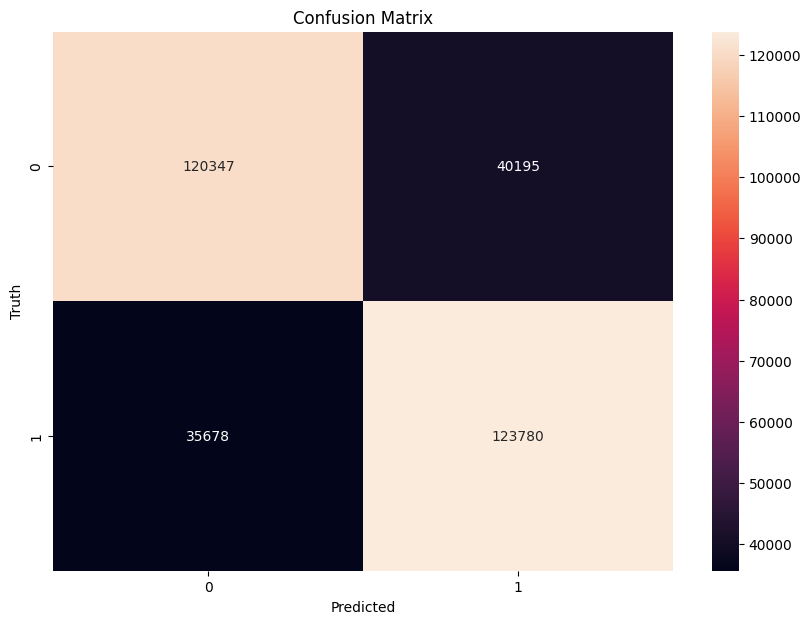

In [43]:
y_pred = CNN.predict(X_test)
y_pred_rounded = np.round(y_pred)
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_rounded)


plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
def inception_block(input_layer, channels=1):
    l1 = Conv1D(channels*4, 1, activation='relu')(input_layer)
    l1 = BatchNormalization()(l1)
    l2 = Conv1D(channels*2, 1, activation='relu')(input_layer)
    l2 = Conv1D(channels*2, 3, padding='same', activation='relu')(l2)
    l2= BatchNormalization()(l2)
    
    l3 = Conv1D(channels, 1, activation='relu')(input_layer)
    l3 = Conv1D(channels, 5, padding='same', activation='relu')(l3)
    l3 = l3= BatchNormalization()(l3)

    concat = Concatenate(axis=-1)([l1, l2, l3])
    return concat


   
def inception_model(vocabulary_size, max_len, embedding_dim, num_blocks=1, channels=1):
    inputs = Input(shape=(max_len,))
    embedding = Embedding(vocabulary_size, embedding_dim, input_length=max_len)(inputs)

    inception_output = inception_block(embedding, channels)
    for _ in range(num_blocks - 1):
        inception_output = inception_block(inception_output, channels)

    output = GlobalAveragePooling1D()(inception_output)
    output = Dense(1, activation='sigmoid')(output)

    model = Model(inputs=inputs, outputs=output)
    return model

num_blocks = 5  # Number of inception blocks
channels = 32  # Number of channels

model = inception_model(vocabulary_size, max_len, embedding_dim, num_blocks, channels)
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 40)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 40, 100)   │ 45,853,800 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 40, 64)    │      6,464 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 40, 32)    │      3,232 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 40, 128)   │     12,928 │ embedding[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 40, 64)    │     12,352 │ conv1d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 40, 32)    │      5,152 │ conv1d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 40, 128)   │        512 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 64)    │        256 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 32)    │        128 │ conv1d_4[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 40, 224)   │          0 │ batch_normalizat… │
│ (Concatenate)       │                   │            │ batch_normalizat… │
│                     │                   │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_6 (Conv1D)   │ (None, 40, 64)    │     14,400 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 40, 32)    │      7,200 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_5 (Conv1D)   │ (None, 40, 128)   │     28,800 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 40, 64)    │     12,352 │ conv1d_6[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 40, 32)    │      5,152 │ conv1d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 128)   │        512 │ conv1d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 64)    │        256 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 40, 32)    │        128 │ conv1d_9[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 40, 224)   │          0 │ batch_normalizat

 Total params: 46,170,249 (176.13 MB)

 Trainable params: 46,168,009 (176.12 MB)

 Non-trainable params: 2,240 (8.75 KB)

In [15]:
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics=['accuracy'] )

In [16]:
model.fit(X_train, y_train,batch_size=512, epochs=5)

Epoch 1/5
   2/2500 ━━━━━━━━━━━━━━━━━━━━ 2:36 63ms/step - accuracy: 0.5098 - loss: 0.6969   

I0000 00:00:1715528077.424854     118 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 163s 55ms/step - accuracy: 0.7600 - loss: 0.4875
Epoch 2/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 137s 55ms/step - accuracy: 0.8488 - loss: 0.3441
Epoch 3/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 137s 55ms/step - accuracy: 0.8888 - loss: 0.2583
Epoch 4/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 137s 55ms/step - accuracy: 0.9108 - loss: 0.2107
Epoch 5/5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 138s 55ms/step - accuracy: 0.9251 - loss: 0.1785


In [ ]:
model.evaluate(X_test, y_test)

In [25]:
def predict_sentiments_with_truth(model, tokenizer, data, num_samples=20):
    results = []
    for _ in range(num_samples):
        # Randomly select a sample from the data
        index = np.random.randint(0, len(data))
        tweet = data.iloc[index]['tweet']
        y_true = data.iloc[index]['Sentiment']
        
        # Preprocess the text
        cleaned_tweet = clean_text(tweet)

        # Tokenize and pad the preprocessed text
        sequence = tokenizer.texts_to_sequences([cleaned_tweet])
        padded_sequence = pad_sequences(sequence, maxlen=max_len)

        # Predict sentiment
        prediction = model.predict(padded_sequence)[0][0]

        # Determine sentiment label
        sentiment = "Positive" if prediction >= 0.5 else "Negative"
        
        results.append((tweet, sentiment, y_true))

    return results

# Example usage:
results = predict_sentiments_with_truth(model, tokenizer, df, num_samples=20)
for i, (tweet, sentiment, y_true) in enumerate(results, 1):
    print(f"Sample {i}:")
    print("Tweet:", tweet)
    print("Predicted Sentiment:", sentiment)
    print("True Sentiment:", "Positive" if y_true == 1 else "Negative")
    print()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Sample 1:
Tweet: @Kassiah LMAO. I've actualy seen this one. Pissed myself too. 
Predicted Sentiment: Positive
True Sentiment: Positive

Sample 2:
Tweet: @birdofparadox &lt;3 ur deconstructed pesto salad recipe, maybe I'll make it today!  An